In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



%matplotlib inline


pok_data=pd.read_csv(r"C:\Users\bhava\OneDrive\Desktop\POK\pokemondatascience.csv")


C:\Users\bhava\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
 pok_data.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
pok_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [4]:
pok_data.shape

(721, 23)

In [5]:
pok_data.groupby ('hasMegaEvolution').size()

hasMegaEvolution
False    675
True      46
dtype: int64

<Axes: xlabel='hasMegaEvolution', ylabel='count'>

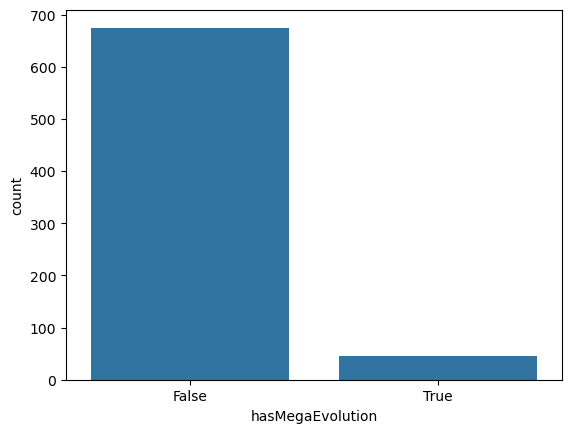

In [6]:
sns.countplot(x ="hasMegaEvolution", data = pok_data)

<Axes: xlabel='hasMegaEvolution', ylabel='count'>

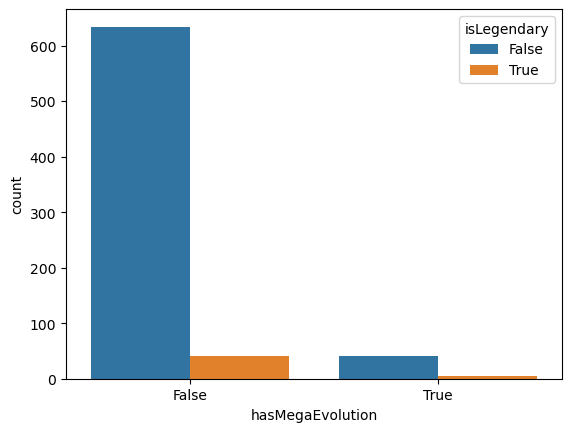

In [7]:
sns.countplot (x ="hasMegaEvolution", hue = "isLegendary", data = pok_data)

<Axes: xlabel='hasMegaEvolution', ylabel='count'>

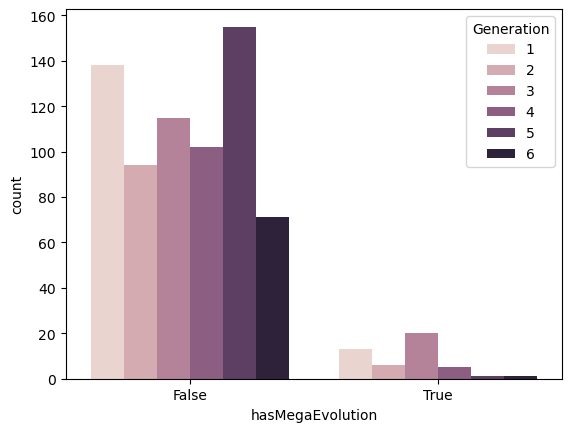

In [8]:
sns.countplot (x ="hasMegaEvolution", hue = "Generation", data = pok_data)

<Axes: >

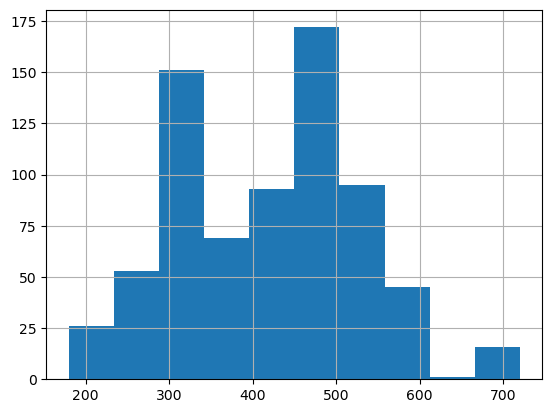

In [9]:
pok_data["Total"] .hist ()

<Axes: >

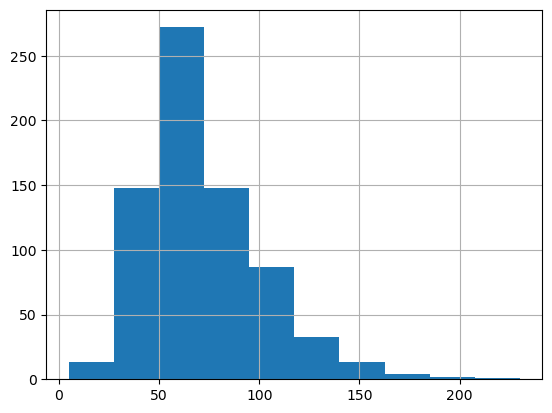

In [10]:
pok_data["Defense"] .hist ()

In [11]:
pok_data.drop("Name", axis = 1, inplace=True)

In [12]:
pok_data.head()

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [13]:
pok_data.drop("Number", axis = 1, inplace=True)

In [14]:
pok_data.drop("Color", axis = 1, inplace=True)

In [15]:
pok_data.drop("Egg_Group_2", axis = 1, inplace=True)

In [16]:
pok_data.drop("Pr_Male", axis = 1, inplace=True)

In [17]:
pok_data.drop("Type_2", axis = 1, inplace=True)

In [18]:
pok_data.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Grass,318,45,49,49,65,65,45,1,False,True,Monster,False,0.71,6.9,45,quadruped
1,Grass,405,60,62,63,80,80,60,1,False,True,Monster,False,0.99,13.0,45,quadruped
2,Grass,525,80,82,83,100,100,80,1,False,True,Monster,True,2.01,100.0,45,quadruped
3,Fire,309,39,52,43,60,50,65,1,False,True,Monster,False,0.61,8.5,45,bipedal_tailed
4,Fire,405,58,64,58,80,65,80,1,False,True,Monster,False,1.09,19.0,45,bipedal_tailed


In [19]:
pok_data.drop("Catch_Rate", axis = 1, inplace=True)

In [20]:
pok_data.shape

(721, 16)

In [21]:
pok_data.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Body_Style
0,Grass,318,45,49,49,65,65,45,1,False,True,Monster,False,0.71,6.9,quadruped
1,Grass,405,60,62,63,80,80,60,1,False,True,Monster,False,0.99,13.0,quadruped
2,Grass,525,80,82,83,100,100,80,1,False,True,Monster,True,2.01,100.0,quadruped
3,Fire,309,39,52,43,60,50,65,1,False,True,Monster,False,0.61,8.5,bipedal_tailed
4,Fire,405,58,64,58,80,65,80,1,False,True,Monster,False,1.09,19.0,bipedal_tailed


In [22]:
pok_data.shape

(721, 16)

In [23]:
pok_data.dropna(inplace=True)

In [24]:
pok_data.shape

(721, 16)

In [25]:
pok_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type_1            721 non-null    object 
 1   Total             721 non-null    int64  
 2   HP                721 non-null    int64  
 3   Attack            721 non-null    int64  
 4   Defense           721 non-null    int64  
 5   Sp_Atk            721 non-null    int64  
 6   Sp_Def            721 non-null    int64  
 7   Speed             721 non-null    int64  
 8   Generation        721 non-null    int64  
 9   isLegendary       721 non-null    bool   
 10  hasGender         721 non-null    bool   
 11  Egg_Group_1       721 non-null    object 
 12  hasMegaEvolution  721 non-null    bool   
 13  Height_m          721 non-null    float64
 14  Weight_kg         721 non-null    float64
 15  Body_Style        721 non-null    object 
dtypes: bool(3), float64(2), int64(8), object(3)


In [26]:
 pok_data.isnull()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Body_Style
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
717,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
718,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
719,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
pok_data.isnull().sum()

Type_1              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
hasGender           0
Egg_Group_1         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Body_Style          0
dtype: int64

In [28]:
 pok_data.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Body_Style
0,Grass,318,45,49,49,65,65,45,1,False,True,Monster,False,0.71,6.9,quadruped
1,Grass,405,60,62,63,80,80,60,1,False,True,Monster,False,0.99,13.0,quadruped
2,Grass,525,80,82,83,100,100,80,1,False,True,Monster,True,2.01,100.0,quadruped
3,Fire,309,39,52,43,60,50,65,1,False,True,Monster,False,0.61,8.5,bipedal_tailed
4,Fire,405,58,64,58,80,65,80,1,False,True,Monster,False,1.09,19.0,bipedal_tailed


In [29]:
pd.get_dummies(pok_data['Type_1'])

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
717,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
718,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
719,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [30]:
type_1= pd.get_dummies(pok_data['Type_1'], dtype=int)

In [31]:
isLegendary=pd.get_dummies(pok_data['isLegendary'], dtype=int, drop_first=True,prefix='isLegendary')

In [32]:
hasGender=pd.get_dummies(pok_data['hasGender'], dtype=int, drop_first=True, prefix='hasGender')

In [33]:
print(type(isLegendary))

<class 'pandas.core.frame.DataFrame'>


In [34]:
Egg_Group_1= pd.get_dummies(pok_data['Egg_Group_1'], dtype=int)

In [35]:
Body_Style = pd.get_dummies(pok_data['Body_Style'], dtype=int)

In [36]:
pok_data=pd.concat([pok_data,type_1,isLegendary,hasGender,Egg_Group_1,Body_Style],axis=1)

In [37]:
 pok_data.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,...,head_base,head_legs,head_only,insectoid,multiple_bodies,quadruped,serpentine_body,several_limbs,two_wings,with_fins
0,Grass,318,45,49,49,65,65,45,1,False,...,0,0,0,0,0,1,0,0,0,0
1,Grass,405,60,62,63,80,80,60,1,False,...,0,0,0,0,0,1,0,0,0,0
2,Grass,525,80,82,83,100,100,80,1,False,...,0,0,0,0,0,1,0,0,0,0
3,Fire,309,39,52,43,60,50,65,1,False,...,0,0,0,0,0,0,0,0,0,0
4,Fire,405,58,64,58,80,65,80,1,False,...,0,0,0,0,0,0,0,0,0,0


In [38]:
pok_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type_1            721 non-null    object 
 1   Total             721 non-null    int64  
 2   HP                721 non-null    int64  
 3   Attack            721 non-null    int64  
 4   Defense           721 non-null    int64  
 5   Sp_Atk            721 non-null    int64  
 6   Sp_Def            721 non-null    int64  
 7   Speed             721 non-null    int64  
 8   Generation        721 non-null    int64  
 9   isLegendary       721 non-null    bool   
 10  hasGender         721 non-null    bool   
 11  Egg_Group_1       721 non-null    object 
 12  hasMegaEvolution  721 non-null    bool   
 13  Height_m          721 non-null    float64
 14  Weight_kg         721 non-null    float64
 15  Body_Style        721 non-null    object 
 16  Bug               721 non-null    int32  
 1

In [39]:
pd.get_dummies(pok_data['hasMegaEvolution'], dtype=int, drop_first=True, prefix='hasMegaEvolution' )

,hasMegaEvolution_True
0,0
1,0
2,1
3,0
4,0
...,...
716,0
717,0
718,1
719,0


In [40]:
has_m = pd.get_dummies(pok_data['hasMegaEvolution'], dtype=int, drop_first=True, prefix='hasMegaEvolution' )

In [41]:
pok_data=pd.concat([pok_data,has_m],axis=1)

In [42]:
pok_data.drop(['Type_1','isLegendary','hasGender','Egg_Group_1','Body_Style','hasMegaEvolution'], axis = 1, inplace=True)

In [43]:
pok_data.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Height_m,Weight_kg,...,head_legs,head_only,insectoid,multiple_bodies,quadruped,serpentine_body,several_limbs,two_wings,with_fins,hasMegaEvolution_True
0,318,45,49,49,65,65,45,1,0.71,6.9,...,0,0,0,0,1,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0.99,13.0,...,0,0,0,0,1,0,0,0,0,0
2,525,80,82,83,100,100,80,1,2.01,100.0,...,0,0,0,0,1,0,0,0,0,1
3,309,39,52,43,60,50,65,1,0.61,8.5,...,0,0,0,0,0,0,0,0,0,0
4,405,58,64,58,80,65,80,1,1.09,19.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
pok_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total                  721 non-null    int64  
 1   HP                     721 non-null    int64  
 2   Attack                 721 non-null    int64  
 3   Defense                721 non-null    int64  
 4   Sp_Atk                 721 non-null    int64  
 5   Sp_Def                 721 non-null    int64  
 6   Speed                  721 non-null    int64  
 7   Generation             721 non-null    int64  
 8   Height_m               721 non-null    float64
 9   Weight_kg              721 non-null    float64
 10  Bug                    721 non-null    int32  
 11  Dark                   721 non-null    int32  
 12  Dragon                 721 non-null    int32  
 13  Electric               721 non-null    int32  
 14  Fairy                  721 non-null    int32  
 15  Fighti

In [45]:
Y= pok_data['hasMegaEvolution_True']
X= pok_data.drop(['hasMegaEvolution_True'], axis = 1 )

In [46]:
from sklearn import model_selection

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [48]:
test_set_size = 0.2
seed = 1
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)
model = LogisticRegression (solver = 'liblinear')
model.fit (X_train, Y_train)

LogisticRegression(solver='liblinear')

In [49]:
pok_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total                  721 non-null    int64  
 1   HP                     721 non-null    int64  
 2   Attack                 721 non-null    int64  
 3   Defense                721 non-null    int64  
 4   Sp_Atk                 721 non-null    int64  
 5   Sp_Def                 721 non-null    int64  
 6   Speed                  721 non-null    int64  
 7   Generation             721 non-null    int64  
 8   Height_m               721 non-null    float64
 9   Weight_kg              721 non-null    float64
 10  Bug                    721 non-null    int32  
 11  Dark                   721 non-null    int32  
 12  Dragon                 721 non-null    int32  
 13  Electric               721 non-null    int32  
 14  Fairy                  721 non-null    int32  
 15  Fighti

In [50]:
predictions = model.predict (X_test)
report = classification_report (Y_test, predictions)

In [51]:
print (report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       135
           1       0.50      0.10      0.17        10

    accuracy                           0.93       145
   macro avg       0.72      0.55      0.57       145
weighted avg       0.91      0.93      0.91       145



In [52]:
print (confusion_matrix (Y_test, predictions))

[[134   1]
 [  9   1]]


In [53]:
accuracy_score (Y_test, predictions)

0.9310344827586207